In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,SpatialDropout1D, Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from keras.models import Sequential
from  tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/glove6b/glove.6B.200d.txt
/kaggle/input/glove6b/glove.6B.50d.txt
/kaggle/input/glove6b/glove.6B.300d.txt
/kaggle/input/glove6b/glove.6B.100d.txt
/kaggle/input/shai-training-2022-a-level-2/sample_submission.csv
/kaggle/input/shai-training-2022-a-level-2/Valid.csv
/kaggle/input/shai-training-2022-a-level-2/Train.csv
/kaggle/input/shai-training-2022-a-level-2/Test.csv
/kaggle/input/nlp-clean-data/clean_tr.csv
/kaggle/input/nlp-clean-data/clean_val.csv
/kaggle/input/nlp-clean-data/clean_test.csv


## Reading Dataset

In [2]:
df_tr = pd.read_csv('../input/nlp-clean-data/clean_tr.csv')
df_val = pd.read_csv('../input/nlp-clean-data/clean_val.csv')

In [5]:
# Training data
df_tr.head()

,text,label,clean_text,clean_text_stem,clean_text_lema
0,I grew up (b. 1965) watching and loving the Th...,0,grew b watching loving thunderbirds mates scho...,grew b watch love thunderbird mate schol watch...,grew b watching loving thunderbird mate schol ...
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chips expectatio...,put movi dvd player sat coke chip expect hope ...,put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,0,people know particular time past like fel ned ...,peopl know particular time past like fel ned t...,people know particular time past like fel ned ...
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movies bor...,even though great interest biblic movi bore de...,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dads army fan nothing ever change ...,im die hard dad armi fan noth ever chang got t...,im die hard dad army fan nothing ever change g...


In [6]:
# Training data
df_val.head()

,text,label,clean_text,clean_text_stem,clean_text_lema
0,It's been about 14 years since Sharon Stone aw...,0,years since sharon stone awarded viewers legc...,year sinc sharon stone award viewer legcros tw...,year since sharon stone awarded viewer legcros...
1,someone needed to make a car payment... this i...,0,someone neded make car payment truly awful mak...,someon nede make car payment truli aw make jea...,someone neded make car payment truly awful mak...
2,The Guidelines state that a comment must conta...,0,guidelines state coment must contain minimum f...,guidelin state coment must contain minimum fou...,guideline state coment must contain minimum fo...
3,This movie is a muddled mish-mash of clichés f...,0,movie mudled mishmash clichés recent cinema pr...,movi mudl mishmash cliché recent cinema promis...,movie mudled mishmash clichés recent cinema pr...
4,Before Stan Laurel became the smaller half of ...,0,stan laurel became smaler half altime greatest...,stan laurel becam smaler half altim greatest c...,stan laurel became smaler half altime greatest...


In [7]:
#check shapes
print(df_tr.shape)
print(df_val.shape)

(40000, 5)
(5000, 5)


## ML/NB Model without lema|stem

## Vectorization

In [17]:
tf_idf_vect = TfidfVectorizer()

Xtrain_tf_idf=tf_idf_vect.fit_transform(df_tr['clean_text'])

Xval_tf_idf=tf_idf_vect.transform(df_val['clean_text'])


In [14]:
# count_vect = CountVectorizer() # CountVectorizer

# Xtr_count = count_vect.fit_transform(X_train.values)

# Xval_count = count_vect.fit_transform(X_val.values)

# Xtest_count = count_vect.transform(X_test.values)

In [18]:
# Splitting into train and test and validation

X_train, y_train = Xtrain_tf_idf, df_tr['label']

X_val, y_val = Xval_tf_idf, df_val['label']


In [16]:
X_val.shape, y_val.shape

((5000, 150389), (5000,))

### Logistic Regression - Multinomial Naive-Base - LightGBM

In [13]:
# from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB

In [18]:
models = [LogisticRegression, LGBMClassifier, MultinomialNB]
m_names = ['LogisticRegression', 'LGBMClassifier', 'MultinomialNB']

In [19]:
def train_models(X_tr, X_te, y_tr, y_te):
    for i, model in enumerate(models):
        print(f"Model: {m_names[i]}")
        model = model()
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        print('val accuracy %s' % accuracy_score(y_te, y_pred)) 
        plot_confusion_matrix(model, X_te, y_te,cmap = 'Blues')
        plt.grid(False)
        print()

Model: LogisticRegression
val accuracy 0.888

Model: LGBMClassifier
val accuracy 0.8576

Model: MultinomialNB
val accuracy 0.8654



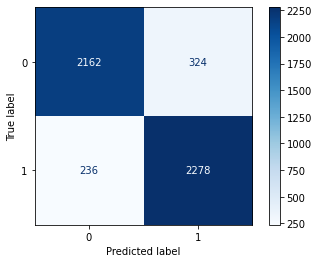

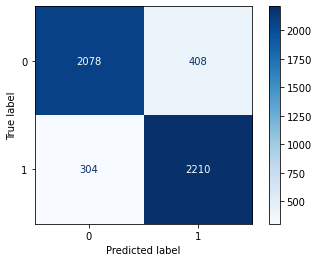

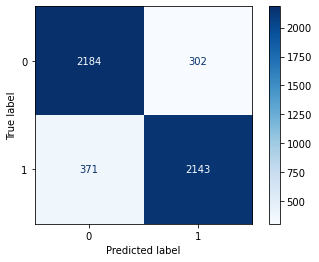

In [20]:
train_models(Xtrain_tf_idf, Xval_tf_idf, y_train, y_val)

## ML/NB Model with lema

In [21]:
Xtrain_tf_idf=tf_idf_vect.fit_transform(df_tr['clean_text_lema'])

Xval_tf_idf=tf_idf_vect.transform(df_val['clean_text_lema'])

# Splitting into train and test and validation

X_train, y_train = Xtrain_tf_idf, df_tr['label']

X_val, y_val = Xval_tf_idf, df_val['label']

print(X_val.shape, y_val.shape)

(5000, 141762) (5000,)


Model: LogisticRegression
val accuracy 0.8864

Model: LGBMClassifier
val accuracy 0.8596

Model: MultinomialNB
val accuracy 0.8656



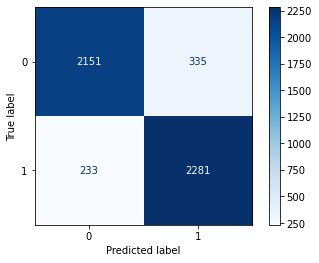

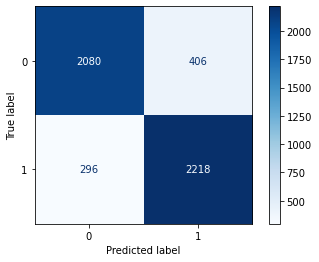

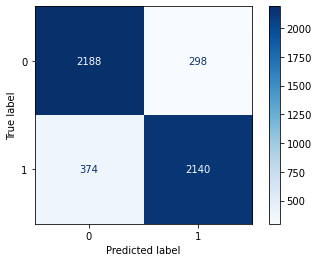

In [22]:
train_models(Xtrain_tf_idf, Xval_tf_idf, y_train, y_val)

## ML/NB Model with stemming

In [78]:
Xtrain_tf_idf=tf_idf_vect.fit_transform(df_tr['clean_text_stem'])

Xval_tf_idf=tf_idf_vect.transform(df_val['clean_text_stem'])

# Splitting into train and test and validation

X_train, y_train = Xtrain_tf_idf, df_tr['label']

X_val, y_val = Xval_tf_idf, df_val['label']

print(X_val.shape, y_val.shape)

(5000, 117130) (5000,)


Model: LogisticRegression
val accuracy 0.8906

Model: LGBMClassifier
val accuracy 0.8526

Model: MultinomialNB
val accuracy 0.858



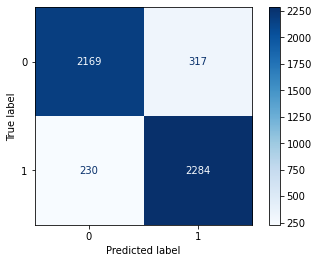

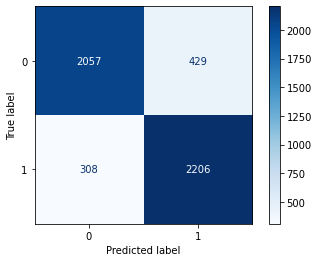

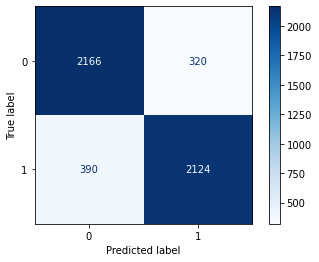

In [79]:
train_models(Xtrain_tf_idf, Xval_tf_idf, y_train, y_val)

In [19]:
# mnb = MultinomialNB()
# mnb.fit(Xtrain_tf_idf, y_train)

log = LogisticRegression()
log.fit(Xtrain_tf_idf, y_train)

LogisticRegression()

In [20]:
y_pred = log.predict(Xval_tf_idf)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
print('val accuracy %s' % accuracy_score(y_val, y_pred))

val accuracy 0.888


In [8]:
test = pd.read_csv('../input/nlp-clean-data/clean_test.csv')
test.shape

(5000, 3)

In [30]:
# submission based on ML model 
submission = pd.DataFrame()
submission['id'] = test['id']
submission['label'] = y_pred.reshape((y_pred.shape[0]))
submission.to_csv('sub_logistic(stem).csv', index=False)

### LSTM Model with lema

In [3]:
#set up the tokenizer
# MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(df_tr['clean_text_lema'])
word_index = tokenizer.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  141788


In [4]:
train_sequences = tokenizer.texts_to_sequences(df_tr['clean_text_lema'])
val_sequences = tokenizer.texts_to_sequences(df_val['clean_text_lema'])


In [5]:
dict(list(word_index.items())[0:10])

{'<oov>': 1,
 'br': 2,
 'movie': 3,
 'film': 4,
 'one': 5,
 'like': 6,
 'god': 7,
 'time': 8,
 'character': 9,
 'even': 10}

In [6]:
max_len = np.max(df_tr['clean_text'].apply(lambda x :len(x)))
max_len 

9059

In [7]:
# #choice of maximum length of sequences
# seq_len_list = [len(i) for i in train_sequences + val_sequences]

# #if we take the direct maximum then
# max_len=max(seq_len_list)
# print('Maximum length of sequence in the list: {}'.format(max_len))

In [8]:
# when setting the maximum length of sequence, variability around the average is used.
# max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
# max_seq_len = int(max_seq_len)
# print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))
# max_seq_len = np.max(df_tr['clean_text'].apply(lambda x :len(x)))

In [9]:

# perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
# print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

In [10]:
#create padded sequences
pad_train=pad_sequences(train_sequences,padding = 'pre',maxlen=max_len)
pad_test=pad_sequences(val_sequences, padding = 'pre',maxlen=max_len)

In [11]:
# Is the total vocabulary size + padding token
num_features = len(tokenizer.index_word) + 1
print(num_features)


141789


In [12]:
# from sklearn.model_selection import train_test_split

Xtrain = pad_train 
ytrain = df_tr['label'].copy()

# Xtrain, Xval, ytrain, yval = train_test_split(x_train, y_train, test_size=0.2, random_state=42 ,stratify=y_train)

Xval = pad_test

yval = df_val['label'].copy()


In [13]:
# from tensorflow.keras.callbacks import LearningRateScheduler

# #creates a function that updates the learning rate based on the epoch number
# def scheduler(epoch, lr):
#     if epoch < 2:
#         return 0.01
#     else:
#         return lr * 0.99

# lr_scheduler = LearningRateScheduler(scheduler)

In [14]:
# from tensorflow.keras.callbacks import Callback

# class CustomCallback(Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if logs.get('accuracy') > 0.95:
#             print("Accuracy over 95%... Stopping training")
#             self.model.stop_training = True

# my_callback = CustomCallback()

In [23]:
def lstm_model(Xtrain,Xval,ytrain,yval,V,D,maxlen,epochs):

    print("----Building the model----")
#     i = Input(shape=(maxlen,))
#     x = Embedding(V + 1, D,input_length = max_len)(i)
# #     x = SpatialDropout1D(0.2)(x)
# #     x = LSTM(64,dropout=0.2, recurrent_dropout=0.2)(x)
# #     x = LSTM(32,dropout=0.2, recurrent_dropout=0.2)(x)
#     x = LSTM(64)(x)
#     x = Dropout(0.4)(x)
#     x = Dense(16,activation='relu')(x)
#     x = Dense(1, activation='sigmoid')(x)
    i = Input(shape=(maxlen,))
    x = Embedding(V + 1, D,input_length = maxlen)(i)
    x = SpatialDropout1D(0.2)(x)
    x = LSTM(64, dropout=0.2)(x)
#     x = Dropout(0.2)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(i, x)
    model.summary()

    #Training the LSTM
    print("----Training the network----")
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
#     #early_stop = EarlyStopping(monitor='val_accuracy', 
#                                mode='min', 
#                                patience = 2 )
#     #checkpoints= ModelCheckpoint(filepath='./',
#                             monitor="val_accuracy",
#                             verbose=0,
#                             save_best_only=True
#                            )
  #  callbacks = [checkpoints,early_stop]
    r = model.fit(Xtrain,ytrain, 
                  validation_data = (Xval,yval), 
                  epochs = epochs, 
                  verbose ='auto',
                  batch_size = 64)
#                   callbacks= callbacks)
    print("Train score:", model.evaluate(Xtrain,ytrain))
    print("Validation score:", model.evaluate(Xval,yval))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs 

In [ ]:
D = 16 #embedding dims
epochs = 10
r,model,n_epochs = lstm_model(Xtrain,Xval,ytrain,yval,V,D,max_len,epochs)

----Building the model----
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 9059)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 9059, 16)          2268624   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 9059, 16)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                20736     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 2,289,425
Trainable params: 2,289,425
Non-trainable params: 0
_________________________________________________________________
----Training the network----


2022-11-12 05:34:03.952304: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1449440000 exceeds 10% of free system memory.


Epoch 1/10


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f11f25d50e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


625/625 [==============================] - 261s 266ms/step - loss: 0.3856 - accuracy: 0.8204 - val_loss: 0.2687 - val_accuracy: 0.8888
Epoch 2/10
625/625 [==============================] - 166s 266ms/step - loss: 0.1931 - accuracy: 0.9282 - val_loss: 0.2937 - val_accuracy: 0.8932
Epoch 3/10
625/625 [==============================] - 167s 266ms/step - loss: 0.1221 - accuracy: 0.9577 - val_loss: 0.3152 - val_accuracy: 0.8890
Epoch 4/10
625/625 [==============================] - 166s 266ms/step - loss: 0.0778 - accuracy: 0.9744 - val_loss: 0.3747 - val_accuracy: 0.8874
Epoch 5/10
625/625 [==============================] - 166s 266ms/step - loss: 0.0570 - accuracy: 0.9808 - val_loss: 0.4025 - val_accuracy: 0.8836
Epoch 6/10
625/625 [==============================] - 166s 265ms/step - loss: 0.0471 - accuracy: 0.9843 - val_loss: 0.4098 - val_accuracy: 0.8806
Epoch 7/10
625/625 [==============================] - 166s 266ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.4389 - val_accura

In [18]:
# save model to single file
model.save('lstm_model_lema.h5')


In [19]:
# from keras.models import load_model

# load model from single file
# model = load_model('lstm_model.h5')
# make predictions
ypred = model.predict(Xval)
print(ypred)


[[0.08002235]
 [0.00173887]
 [0.02174234]
 ...
 [0.93218905]
 [0.99718744]
 [0.9918263 ]]


In [20]:
ypred.shape

(5000, 1)

In [21]:
seq_predictions=model.predict(Xval)
print('Outputs shape')    
print(seq_predictions.shape) # prints (n,1) but  need (n,)
seq_predictions=np.transpose(seq_predictions)[0]  # transformation to get (n,)
print(seq_predictions.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold
seq_predictions = list(map(lambda x: 0 if x<0.7 else 1, seq_predictions))
ypred = seq_predictions

Outputs shape
(5000, 1)
(5000,)


In [24]:
# submission based on LSTM model 
submission = pd.DataFrame()
submission['id'] = test['id']
submission['label'] = ypred
submission.to_csv('sub_lstm_lema.csv', index=False)

In [25]:
def plotLearningCurve(history,epochs):
    epochRange = range(1,epochs+1)
    fig , ax = plt.subplots(1,2,figsize = (10,5))

    ax[0].plot(epochRange,history.history['accuracy'],label = 'Training Accuracy')
    ax[0].plot(epochRange,history.history['val_accuracy'],label = 'Validation Accuracy')
    ax[0].set_title('Training and Validation accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    ax[1].plot(epochRange,history.history['loss'],label = 'Training Loss')
    ax[1].plot(epochRange,history.history['val_loss'],label = 'Validation Loss')
    ax[1].set_title('Training and Validation loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    fig.tight_layout()
    plt.show()

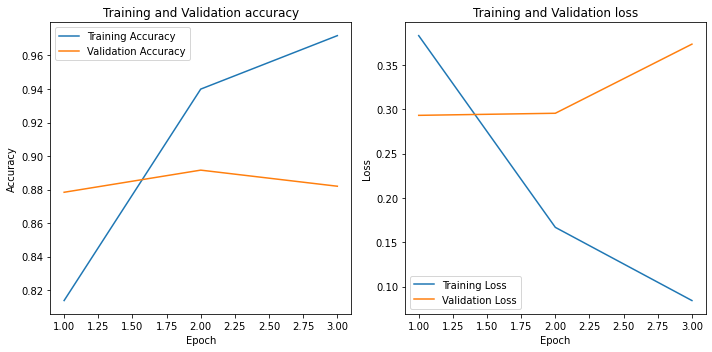

In [26]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

In [27]:
plt.savefig('lstm_lema.png')

<Figure size 432x288 with 0 Axes>

In [28]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(pad_test,yval)
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
157/157 [==============================] - 40s 253ms/step - loss: 0.3735 - accuracy: 0.8820
{'loss': 0.37348079681396484, 'accuracy': 0.8820000290870667}


In [ ]:
# LSTM with lematization cleaned data

tokenizer = Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(df_tr['clean_text_lema'].values)
word_index = tokenizer.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

train_sequences = tokenizer.texts_to_sequences(df_tr['clean_text_lema'].values)
val_sequences = tokenizer.texts_to_sequences(df_val['clean_text_lema'].values)

max_len = np.max(df_tr['clean_text_lema'].apply(lambda x :len(x)))

#create padded sequences
pad_train=pad_sequences(train_sequences,padding = 'post',maxlen=int(max_len), value= 0)
pad_test=pad_sequences(val_sequences, padding = 'post',maxlen=int(max_len),value= 0)

# Splitting
Xtrain = pad_train 
ytrain = df_tr['label'].copy()

Xval = pad_test
yval = df_val['label'].copy()

In [ ]:
D = 32 #embedding dims
epochs = 10
r,model,n_epochs = lstm_model(Xtrain,Xval,ytrain,yval,V,D,max_len,epochs)
# save model to single file
model.save('lstm_model_lema.h5')

# make predictions
ypred = model.predict(Xval)

# Transpose Predictions to match Submission format
seq_predictions=model.predict(Xval)
print('Outputs shape')    
print(seq_predictions.shape) # prints (n,1) but  need (n,)
seq_predictions=np.transpose(seq_predictions)[0]  # transformation to get (n,)
print(seq_predictions.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold
seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, seq_predictions))

# submission based on LSTM model 
submission = pd.DataFrame()
submission['id'] = test['id']
submission['label'] = seq_predictions
submission.to_csv('sub_lstm_lema.csv', index=False)

----Building the model----
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 9059)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 9059, 32)          4537248   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               49664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               12900     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (No

2022-11-11 11:56:12.514551: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1449440000 exceeds 10% of free system memory.


Epoch 1/10


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fa9549b10e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


 65/625 [==>...........................] - ETA: 5:42 - loss: 0.6843 - accuracy: 0.5675

In [29]:
# LSTM with Stemming cleaned data

tokenizer = Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(df_tr['clean_text_stem'].values)
word_index = tokenizer.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

train_sequences = tokenizer.texts_to_sequences(df_tr['clean_text_stem'].values)
val_sequences = tokenizer.texts_to_sequences(df_val['clean_text_stem'].values)

max_len = np.max(df_tr['clean_text_stem'].apply(lambda x :len(x)))

#create padded sequences
pad_train=pad_sequences(train_sequences,padding = 'post',maxlen=int(max_len), value= 0)
pad_test=pad_sequences(val_sequences, padding = 'post',maxlen=int(max_len),value= 0)

# Splitting
Xtrain = pad_train 
ytrain = df_tr['label'].copy()

Xval = pad_test
yval = df_val['label'].copy()

Vocabulary of the dataset is :  117775


In [31]:
D = 16 #embedding dims
epochs = 10
r,model,n_epochs = lstm_model(Xtrain,Xval,ytrain,yval,V,D,max_len,epochs)
# save model to single file
model.save('lstm_model_stem.h5')

# make predictions
ypred = model.predict(Xval)

# Transpose Predictions to match Submission format
seq_predictions=model.predict(Xval)
print('Outputs shape')    
print(seq_predictions.shape) # prints (n,1) but  need (n,)
seq_predictions=np.transpose(seq_predictions)[0]  # transformation to get (n,)
print(seq_predictions.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold
seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, seq_predictions))

# submission based on LSTM model 
submission = pd.DataFrame()
submission['id'] = test['id']
submission['label'] = seq_predictions
submission.to_csv('sub_lstm_stem.csv', index=False)

----Building the model----
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 8250)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 8250, 16)          1884416   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               41472     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,927,969
Trainable params: 1,927,969
Non-trainable params: 0
______________________

2022-11-11 12:47:24.374373: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1320000000 exceeds 10% of free system memory.


Epoch 1/10
625/625 [==============================] - 366s 581ms/step - loss: 0.4133 - accuracy: 0.8108 - val_loss: 0.2940 - val_accuracy: 0.8774
Epoch 2/10
625/625 [==============================] - 364s 583ms/step - loss: 0.2033 - accuracy: 0.9279 - val_loss: 0.3151 - val_accuracy: 0.8936
Epoch 3/10
625/625 [==============================] - 362s 580ms/step - loss: 0.1296 - accuracy: 0.9569 - val_loss: 0.3254 - val_accuracy: 0.8836


2022-11-11 13:06:00.458585: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1320000000 exceeds 10% of free system memory.


1250/1250 [==============================] - 285s 228ms/step - loss: 0.0733 - accuracy: 0.9795
Train score: [0.073340505361557, 0.9795250296592712]
157/157 [==============================] - 36s 230ms/step - loss: 0.3254 - accuracy: 0.8836
Validation score: [0.32535210251808167, 0.8835999965667725]
Outputs shape
(5000, 1)
(5000,)


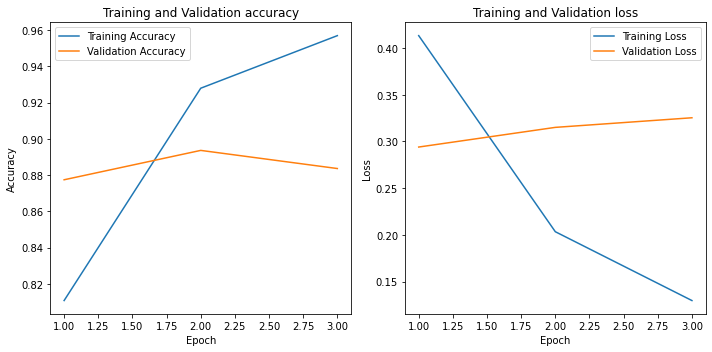

In [32]:
plotLearningCurve(r,n_epochs)

# LSTM with Glove(100d)

In [33]:

MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 200 # max length of each entry (sentence), including padding
EMBEDDING_DIM = 100      # embedding dimensions for word vectors (word2vec/GloVe)
GLOVE_DIR = "../input/glove6b/glove.6B."+str(EMBEDDING_DIM)+"d.txt"

In [37]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df_tr['clean_text_lema'])
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 141787


In [38]:
train_sequences = tokenizer.texts_to_sequences(df_tr['clean_text_lema'].values)
val_sequences = tokenizer.texts_to_sequences(df_val['clean_text_lema'].values)


In [39]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in train_sequences + val_sequences]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

Maximum length of sequence in the list: 1436


In [40]:
# # when setting the maximum length of sequence, variability around the average is used.
# max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
# max_seq_len = int(max_seq_len)
# print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))
# # max_seq_len = np.max(df_tr['clean_text'].apply(lambda x :len(x)))

In [41]:
#create padded sequences
pad_train=pad_sequences(train_sequences, padding = 'post',maxlen=max_len)
pad_test=pad_sequences(val_sequences, padding = 'post',maxlen=max_len)

In [42]:
Xtrain = pad_train 
ytrain = df_tr['label'].copy()

Xval = pad_test
yval = df_val['label'].copy()


In [43]:
embeddings_index = {}
f = open(GLOVE_DIR)
print('Loading GloVe from:', GLOVE_DIR,'...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(" Completed!")

Loading GloVe from: ../input/glove6b/glove.6B.100d.txt ...Done.
 Proceeding with Embedding Matrix... Completed!


In [44]:
sequence_input = Input(shape=(max_len,), dtype='int32')
embedding_layer = Embedding(len(word_index) + 1,
                           EMBEDDING_DIM,
                           weights = [embedding_matrix],
                           input_length = max_len,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
preds = Dense(1, activation="sigmoid")(x)

In [45]:
model = Model(sequence_input, preds)
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

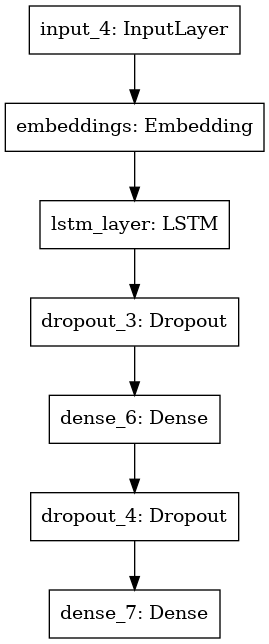

In [46]:
import tensorflow as tf
tf.keras.utils.plot_model(model)


In [47]:
print('Training progress:')
history = model.fit(Xtrain, ytrain, epochs = 10, batch_size=64, validation_data=(Xval, yval))

Training progress:
Epoch 1/10
625/625 [==============================] - 43s 64ms/step - loss: 0.6434 - accuracy: 0.5862 - val_loss: 0.4927 - val_accuracy: 0.7676
Epoch 2/10
625/625 [==============================] - 40s 63ms/step - loss: 0.4351 - accuracy: 0.8033 - val_loss: 0.3911 - val_accuracy: 0.8225
Epoch 3/10
625/625 [==============================] - 40s 63ms/step - loss: 0.3849 - accuracy: 0.8291 - val_loss: 0.4432 - val_accuracy: 0.8038
Epoch 4/10
625/625 [==============================] - 40s 64ms/step - loss: 0.3602 - accuracy: 0.8428 - val_loss: 0.3777 - val_accuracy: 0.8297
Epoch 5/10
625/625 [==============================] - 40s 63ms/step - loss: 0.3398 - accuracy: 0.8519 - val_loss: 0.3476 - val_accuracy: 0.8399
Epoch 6/10
625/625 [==============================] - 39s 63ms/step - loss: 0.3213 - accuracy: 0.8617 - val_loss: 0.3470 - val_accuracy: 0.8446
Epoch 7/10
625/625 [==============================] - 40s 64ms/step - loss: 0.3067 - accuracy: 0.8700 - val_loss: 0.3

In [48]:
# save model to single file
model.save('lstm_glove6b_100d.h5')


In [49]:
ypred = model.predict(Xval)
print(ypred)

[[[0.591963  ]
  [0.66449505]
  [0.59919816]
  ...
  [0.0049056 ]
  [0.00490668]
  [0.00490776]]

 [[0.31779784]
  [0.27848393]
  [0.21841724]
  ...
  [0.00193299]
  [0.00193311]
  [0.00193322]]

 [[0.43406835]
  [0.413     ]
  [0.37494904]
  ...
  [0.09992252]
  [0.09993931]
  [0.09995614]]

 ...

 [[0.5567138 ]
  [0.5085258 ]
  [0.55513465]
  ...
  [0.75511014]
  [0.7550907 ]
  [0.7550713 ]]

 [[0.62195444]
  [0.662024  ]
  [0.6561024 ]
  ...
  [0.98497564]
  [0.98497504]
  [0.9849744 ]]

 [[0.5417483 ]
  [0.49084374]
  [0.5194399 ]
  ...
  [0.46237317]
  [0.4623678 ]
  [0.46236253]]]


In [50]:
seq_predictions=model.predict(Xval)
print('Outputs shape')    
print(seq_predictions.shape) # prints (n,1) but  need (n,)
seq_predictions=np.transpose(seq_predictions)[0]# transformation to get (n,)
print(seq_predictions.shape)  # now the shape is (n,)
seq_predictions=seq_predictions[0]# transformation to get (n,)
print(seq_predictions.shape)
# Applying transformation to get binary values predictions with 0.5 as thresold
seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, seq_predictions))
ypred = seq_predictions

Outputs shape
(5000, 1436, 1)
(1436, 5000)
(5000,)


In [51]:
# submission based on LSTM model 
submission = pd.DataFrame()
submission['id'] = test['id']
submission['label'] = ypred
submission.to_csv('sub_glove6b_100d.csv', index=False)

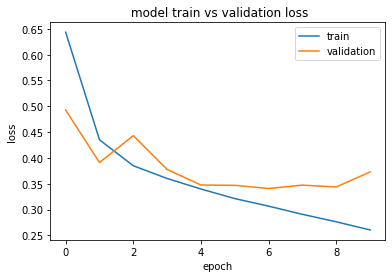

In [61]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title(' model train vs validation loss' )
pyplot.ylabel( 'loss' )
pyplot.xlabel( 'epoch' )
pyplot.legend([ 'train' , 'validation' ], loc= 'upper right' )
pyplot.show()

In [62]:
plt.savefig('lstm_glove6b_100d.png')

<Figure size 432x288 with 0 Axes>

# THANKS -> ShAI Team